<a href="https://colab.research.google.com/github/zvyagind/Data-science/blob/Lesson_8/%D0%A3%D1%80%D0%BE%D0%BA_8_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B1%D0%B5%D0%B7_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D1%8F_%D0%B2_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Тема “Обучение без учителя”

##Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [107]:
data = load_boston()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns = ['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

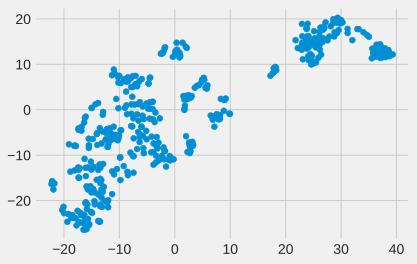

In [108]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

##Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

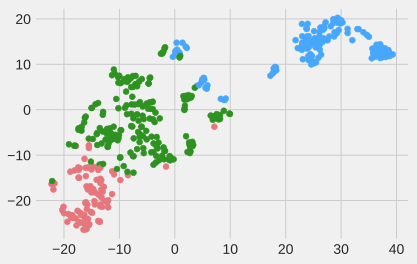

In [109]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter = 100, random_state = 42)
model.fit(X_train_scaled)
# centers = scaler.inverse_transform(model.cluster_centers_)
train_labels = model.fit_predict(X_train_scaled)
colors = [[np.random.random_sample(), np.random.random_sample(), np.random.random_sample()] for _ in range(10)] #['Red', 'Green', 'Blue', 'Yelow', 'Orange']

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = [colors[i] for i in train_labels]) 
plt.show()

In [114]:
X_train_2 = X_train.assign(cluster = train_labels)
X_train_2 = X_train_2.assign(price = y_train)
print('Средние значение price: ')
print(X_train_2.groupby('cluster')['price'].mean().to_markdown(), '\n')
print('Средние значение CRIM: ')
print(X_train_2.groupby('cluster')['CRIM'].mean().to_markdown())


Средние значение price: 
|   cluster |   price |
|----------:|--------:|
|         0 | 24.9581 |
|         1 | 16.1654 |
|         2 | 27.7884 | 

Средние значение CRIM: 
|   cluster |       CRIM |
|----------:|-----------:|
|         0 |  0.42166   |
|         1 | 10.797     |
|         2 |  0.0735656 |


##*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [113]:
labels_test = model.predict(X_test_scaled)
pd.options.mode.chained_assignment = None
df_test = X_test.copy(deep=True)
df_test['cluster'] =  list(labels_test)
df_test['price'] =  y_test
print('Средние значение price: ')
print(df_test.groupby('cluster')['price'].mean().to_markdown(), '\n')
print('Средние значение CRIM: ')
print(df_test.groupby('cluster')['CRIM'].mean().to_markdown())

Средние значение price: 
|   cluster |   price |
|----------:|--------:|
|         0 | 21.8608 |
|         1 | 16.4371 |
|         2 | 31.35   | 

Средние значение CRIM: 
|   cluster |      CRIM |
|----------:|----------:|
|         0 |  0.266079 |
|         1 | 10.1655   |
|         2 |  0.06206  |
